In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = glob.glob('raw_data/2016/hourly_weekday/*.csv')
names = path[0].split('/')
months_list = ['jan-mar', 'apr-jun', 'jul-sep', 'oct-dec']
df = pd.DataFrame()
df.name = (f'{names[2]}_{names[1]}')

In [3]:
x = 0
for filepath in path:
    readfile = pd.read_csv(filepath)
    df_x = pd.DataFrame(readfile)
    df_x['month'] = months_list[x]
    df_x['year'] = names[1]
    df = df.append(df_x, ignore_index=True)
    x += 1
    

In [4]:
df.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,month,year
0,60,169,20,444.38,345.72,357.22,1.89,jan-mar,2016
1,551,522,1,837.27,323.05,777.03,1.47,jan-mar,2016
2,553,502,1,1061.35,851.10,895.14,1.66,jan-mar,2016
3,150,303,0,1139.49,290.77,1104.22,1.28,jan-mar,2016
4,31,132,12,1240.11,297.80,1206.69,1.26,jan-mar,2016


In [5]:
geodata = {}
geo = pd.read_json('raw_data/washington_DC_censustracts.json')
for item in geo['features']:
    mid = int(item['properties']['MOVEMENT_ID'])
    address = item['properties']['DISPLAY_NAME']
    coord = item['geometry']['coordinates'][0][0][0]
    #lon = item['geometry']['coordinates'][0][0][0][0]
    geodata[mid] = (address, *coord)

In [7]:
for ind, row in df.iterrows():

    df.at[ind, 'departure'] = geodata[row['sourceid']][0]
    df.at[ind, 'destination'] = geodata[row['dstid']][0]
    df.at[ind, 'coord_dep'] = (f'{geodata[row["sourceid"]][2]}, {geodata[row["sourceid"]][1]}')
    df.at[ind, 'coord_dest'] = (f'{geodata[row["dstid"]][2]}, {geodata[row["dstid"]][1]}')
    

KeyboardInterrupt: 

In [9]:
df.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,month,year,departure,destination,coord_dep,coord_dest
0,60,169,20,444.38,345.72,357.22,1.89,jan-mar,2016,"3200 Dubois Place Southeast, Southeast Washing...","Meadow Road Northeast, Northeast Washington, W...","38.881435, -76.97072","38.927709, -76.97913"
1,551,522,1,837.27,323.05,777.03,1.47,jan-mar,2016,"4700 Kenmore Avenue, Seminary Hill, Alexandria","3100 Juniper Lane, Falls Church","38.824118, -77.124376","38.860322, -77.165933"
2,553,502,1,1061.35,851.10,895.14,1.66,jan-mar,2016,"4900 Seminary Road, Alexandria West, Alexandria","800 South Payne Street, Southwest Quadrant, Al...","38.834282, -77.117275","38.794617, -77.060861"
3,150,303,0,1139.49,290.77,1104.22,1.28,jan-mar,2016,"1200 13th Street Northwest, Northwest Washingt...","100 Onondaga Drive, Oxon Hill","38.907239, -77.031951","38.792809, -77.03752"
4,31,132,12,1240.11,297.80,1206.69,1.26,jan-mar,2016,"1000 C Street Northeast, Northeast Washington,...","1600 Buchanan Street Northeast, Northeast Wash...","38.890935, -76.994969","38.950269, -76.989528"


In [ ]:
# Visualisation of a mean travel time by hour
sns.barplot(x='hod', y='mean_travel_time', hue='month',
            data=(df[['hod', 'mean_travel_time', 'month']].sample(frac=0.001)), ci=None)

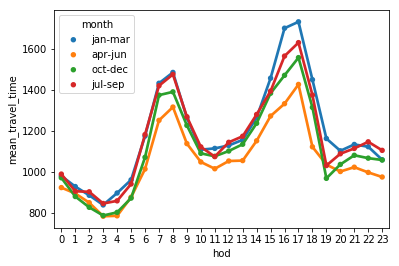

In [10]:
# The same in different plot
sns.pointplot(x='hod', y='mean_travel_time', hue='month',
            data=(df[['hod', 'mean_travel_time', 'month']].sample(frac=0.01)), ci=None, markers='.')

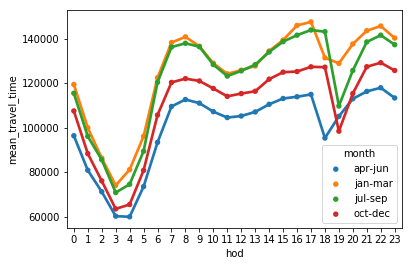

In [11]:
sns.pointplot(x='hod', y='mean_travel_time', hue='month',
                data=(df[['hod', 'mean_travel_time', 'month']].groupby(['month', 'hod']).count().reset_index()),
                ci=None, markers='.')